In [1]:
from load_contours import load_contours
import os

absolute_path = os.path.join(os.getcwd(), '..', '..', 'exports/')
data = load_contours(path=absolute_path+"2019-03-11_e6_d4_DiffGroup9_1-1.jsonl",mask_path=absolute_path+"DiffGroup9_1-1_arena_mask.png")
data

 ...]

26


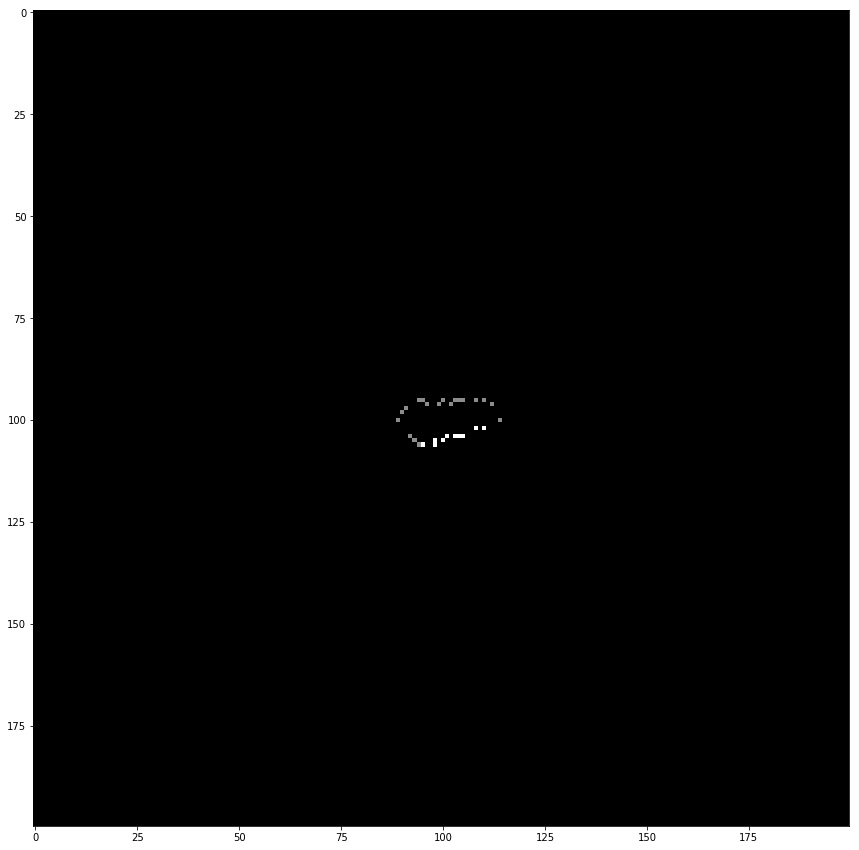

30


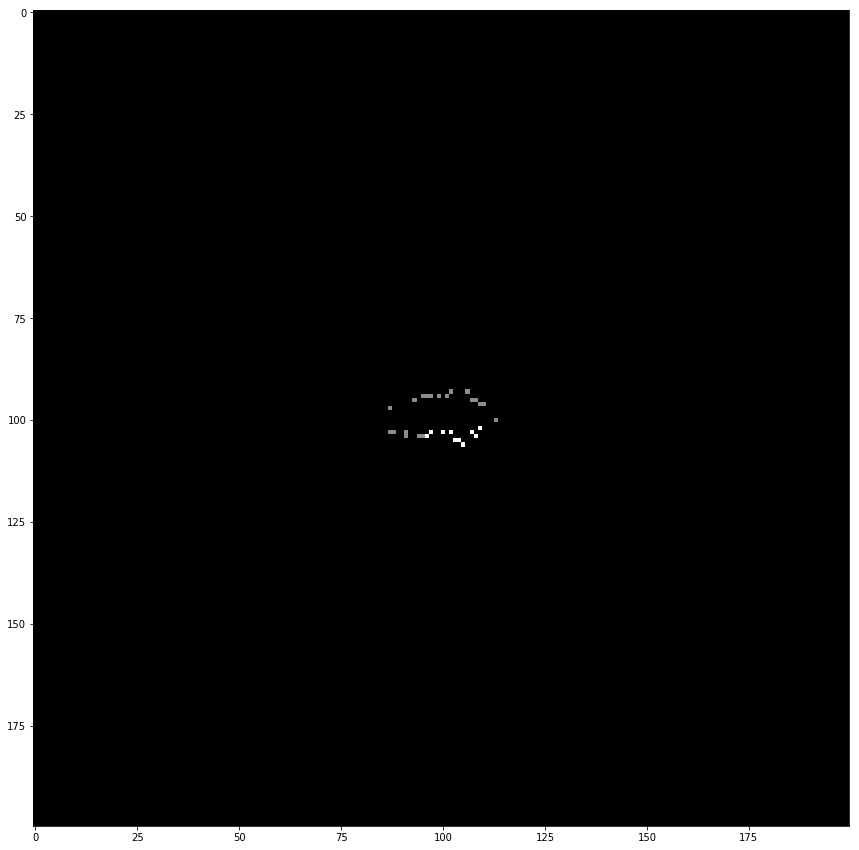

31


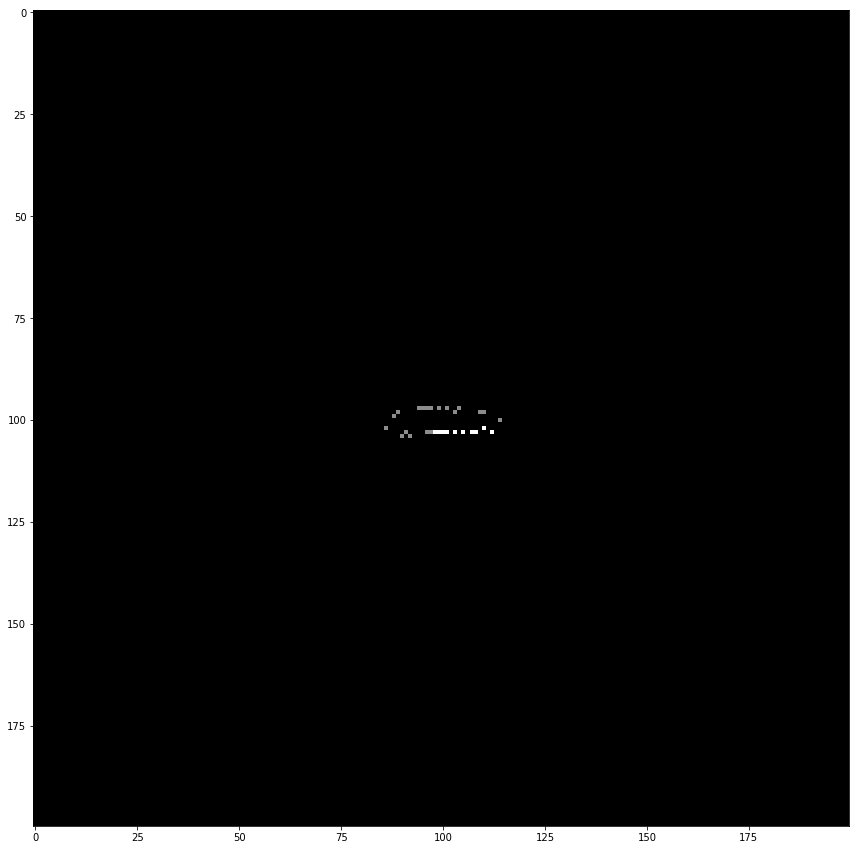

32


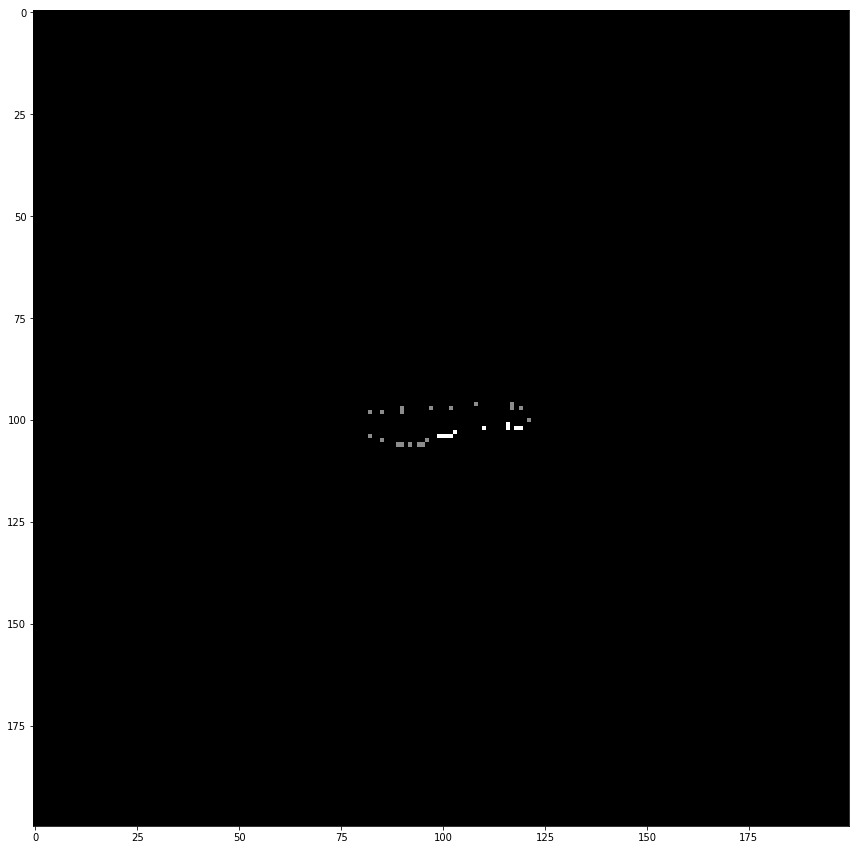

34


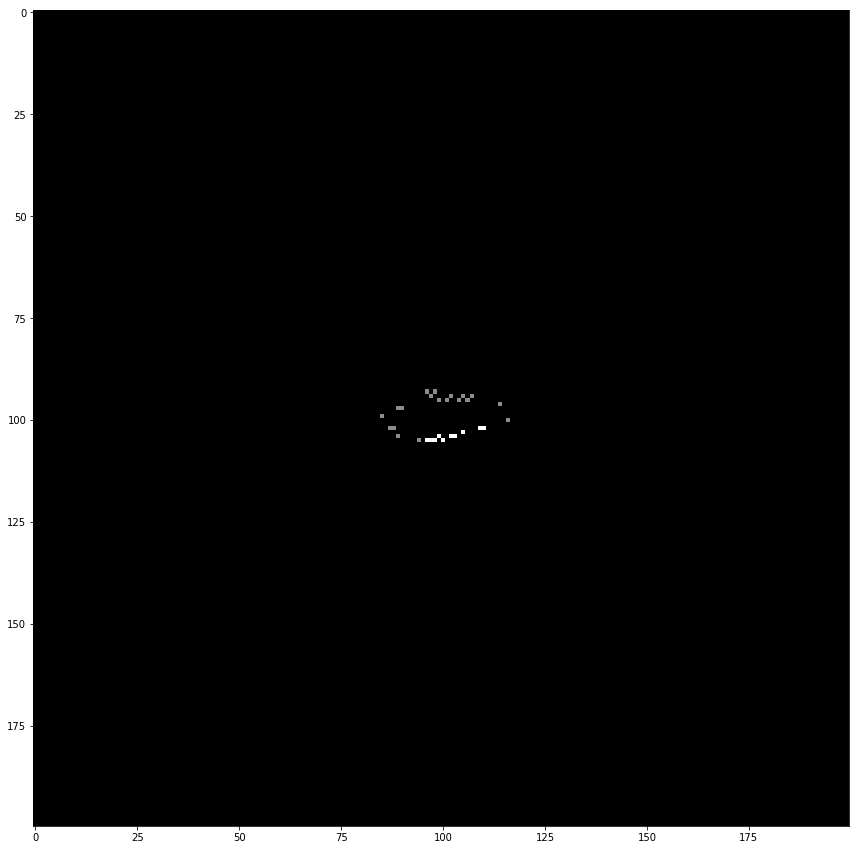

35


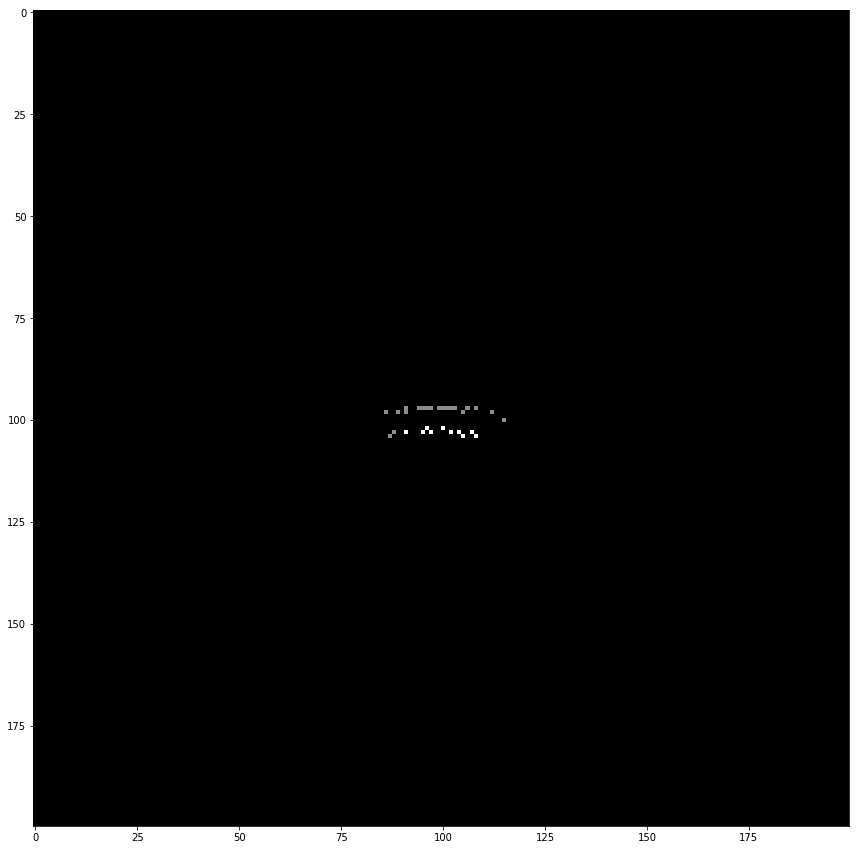

36


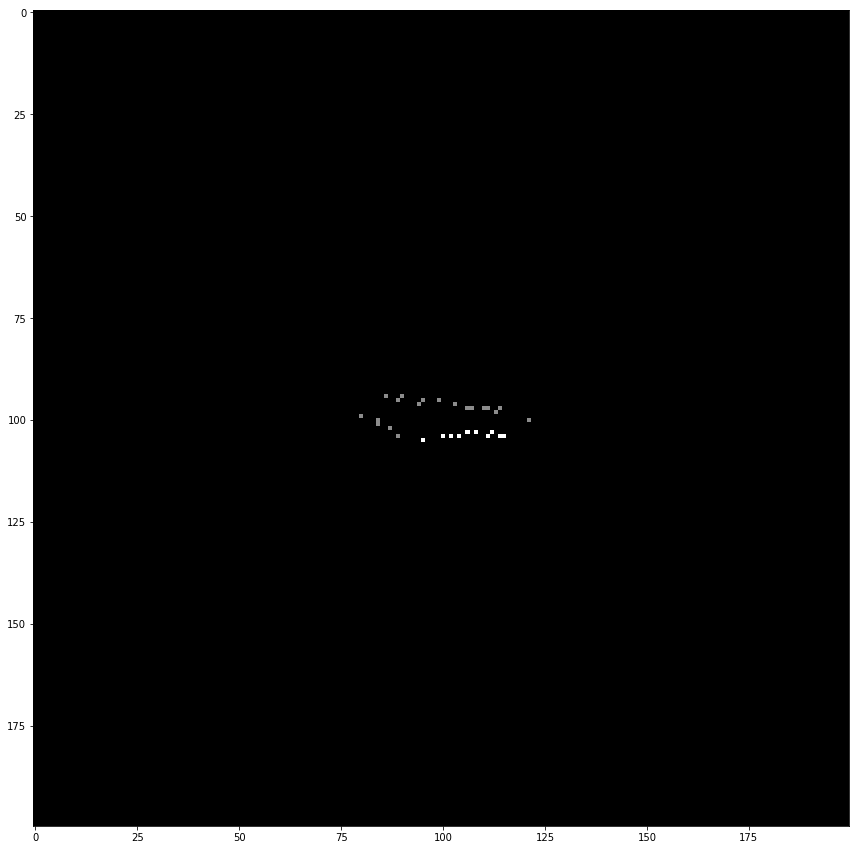

38


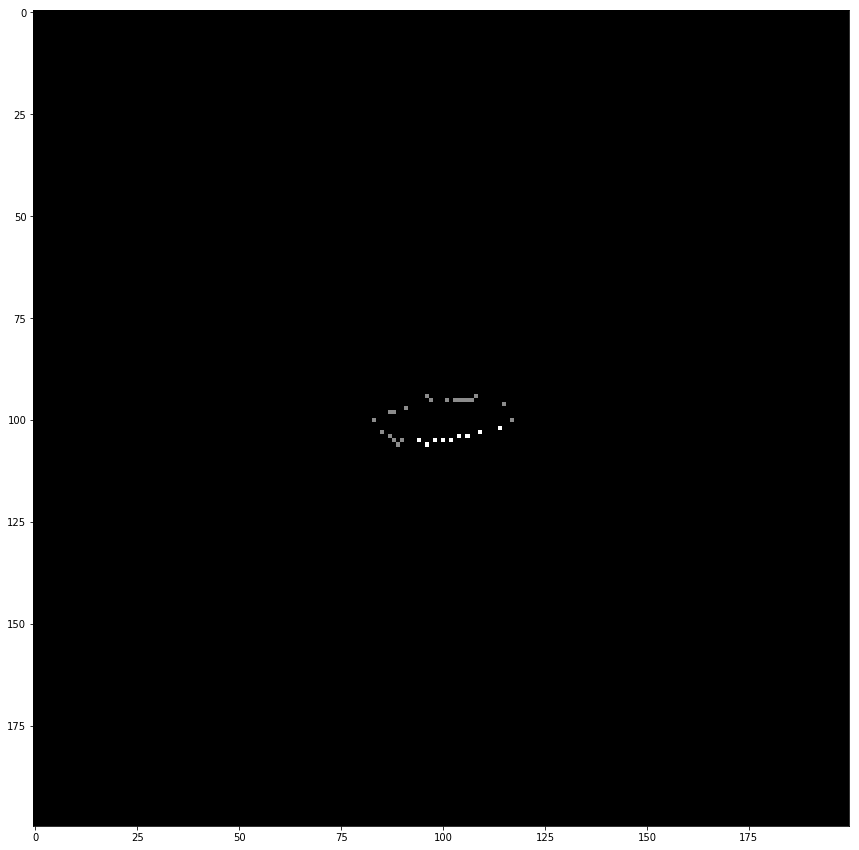

39


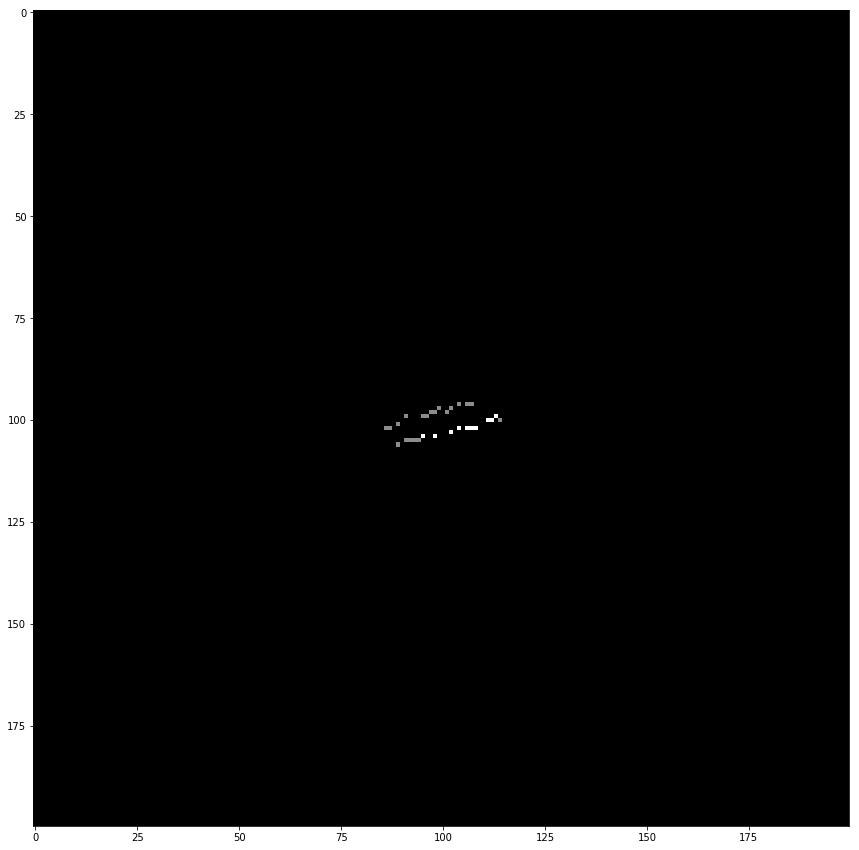

41


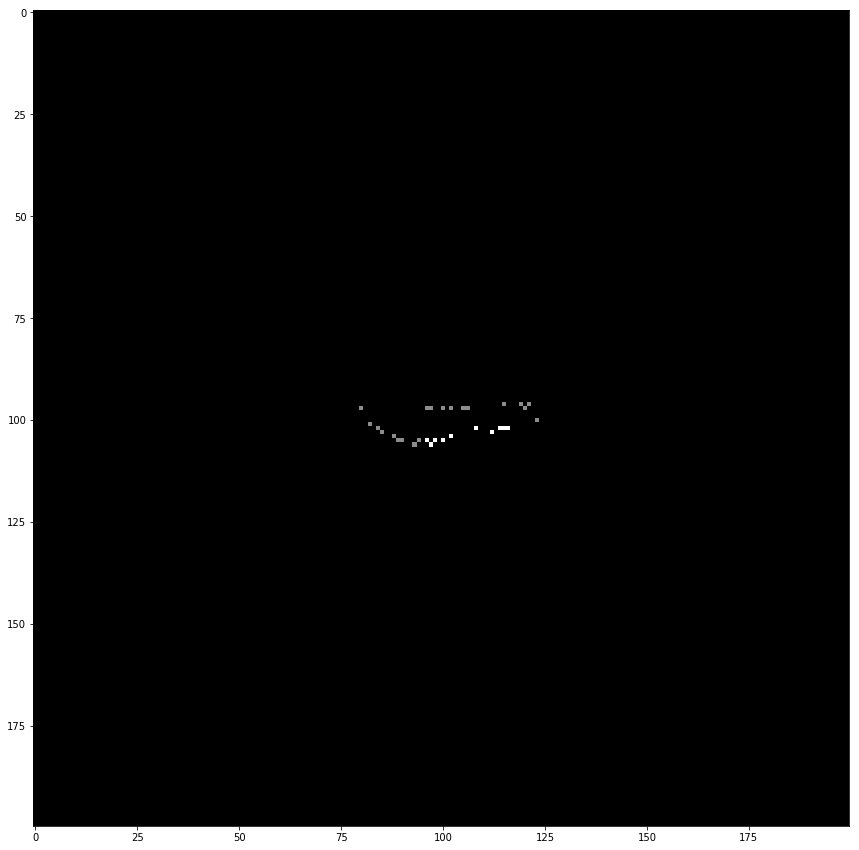

43


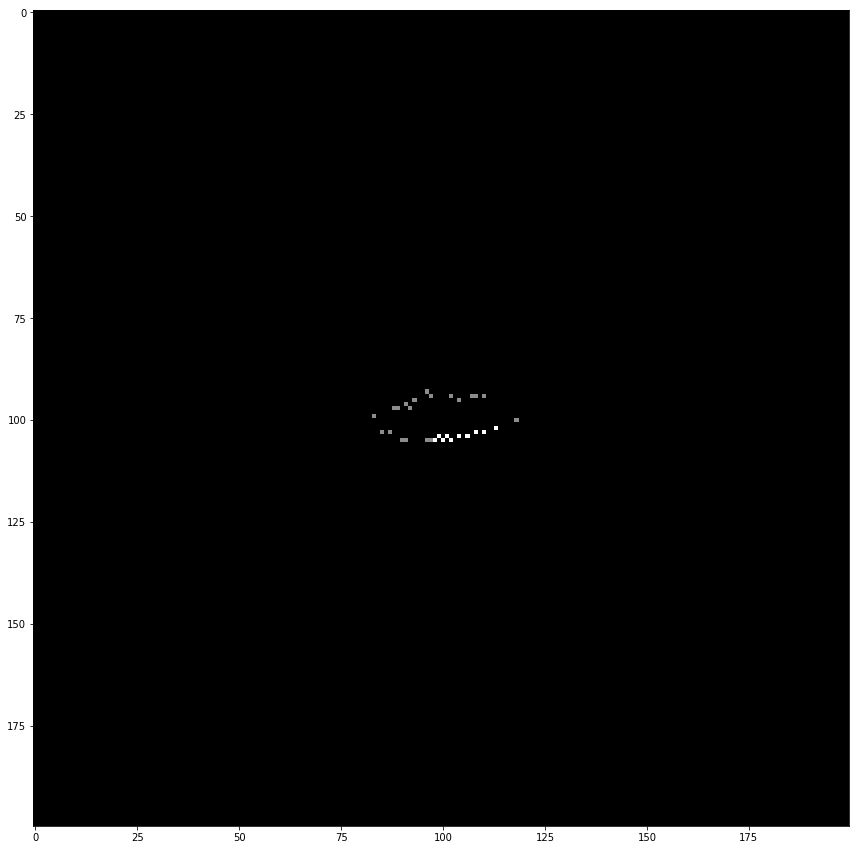

44


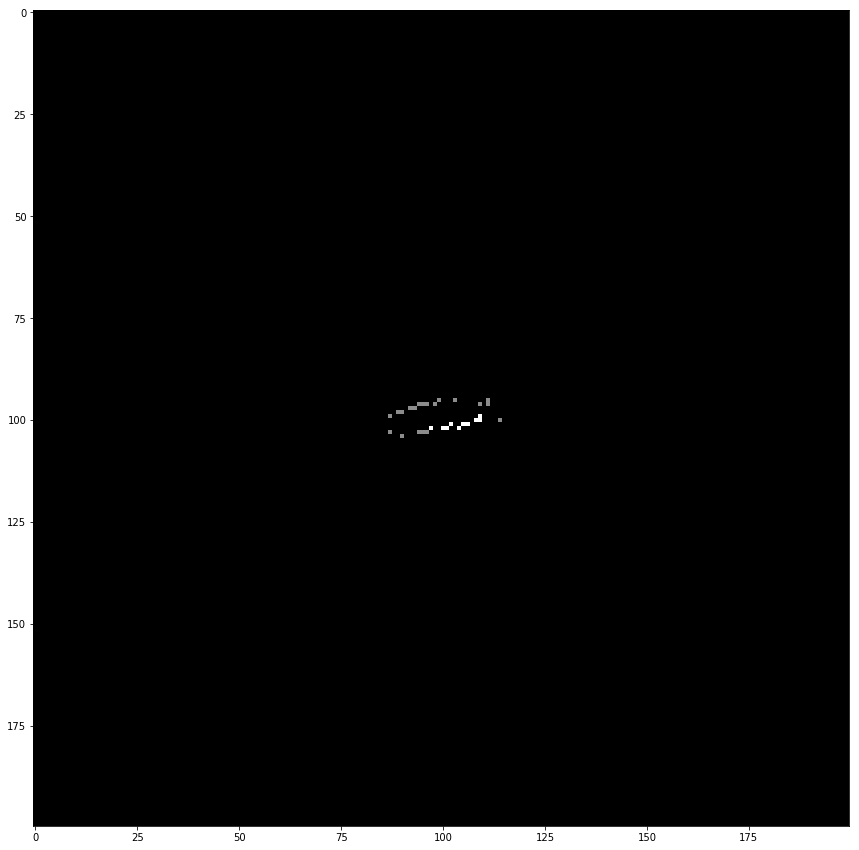

45


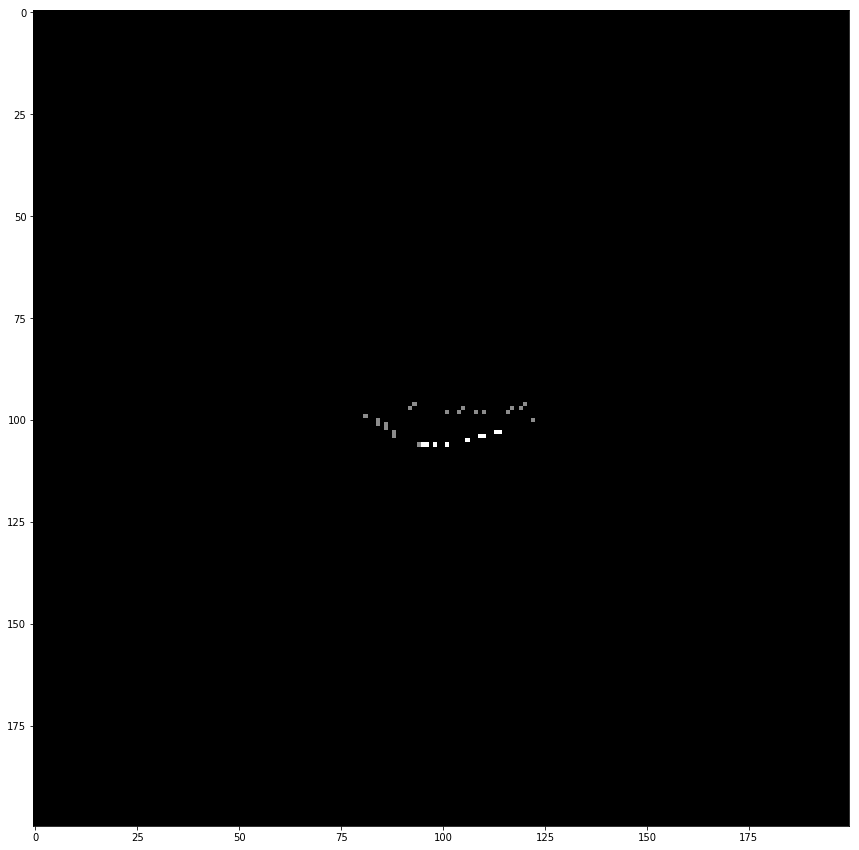

47


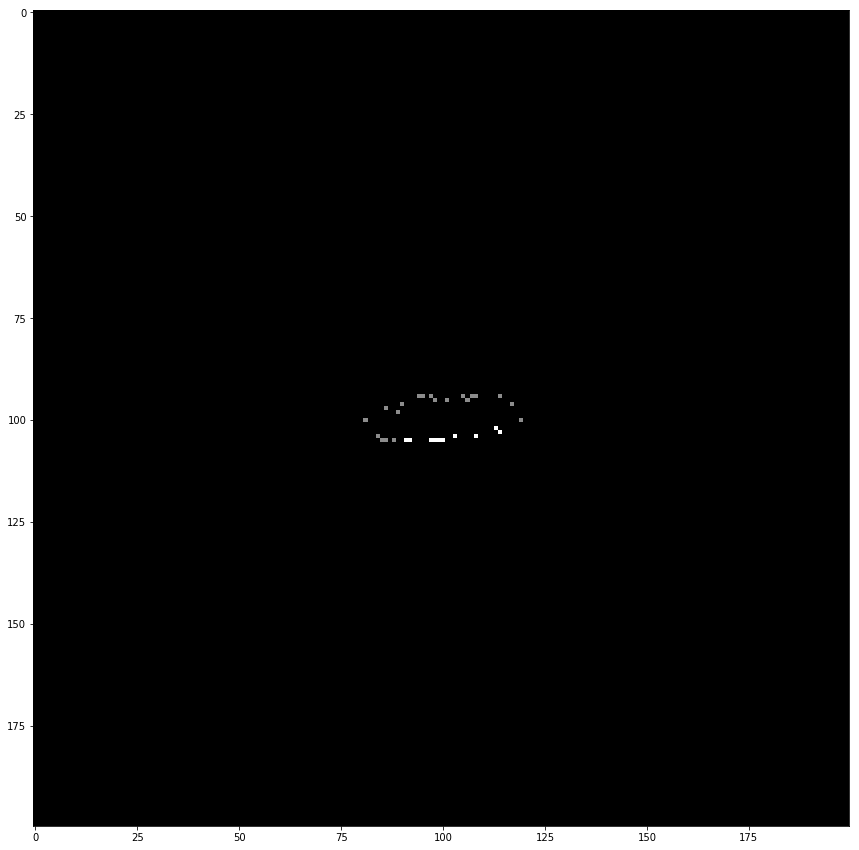

48


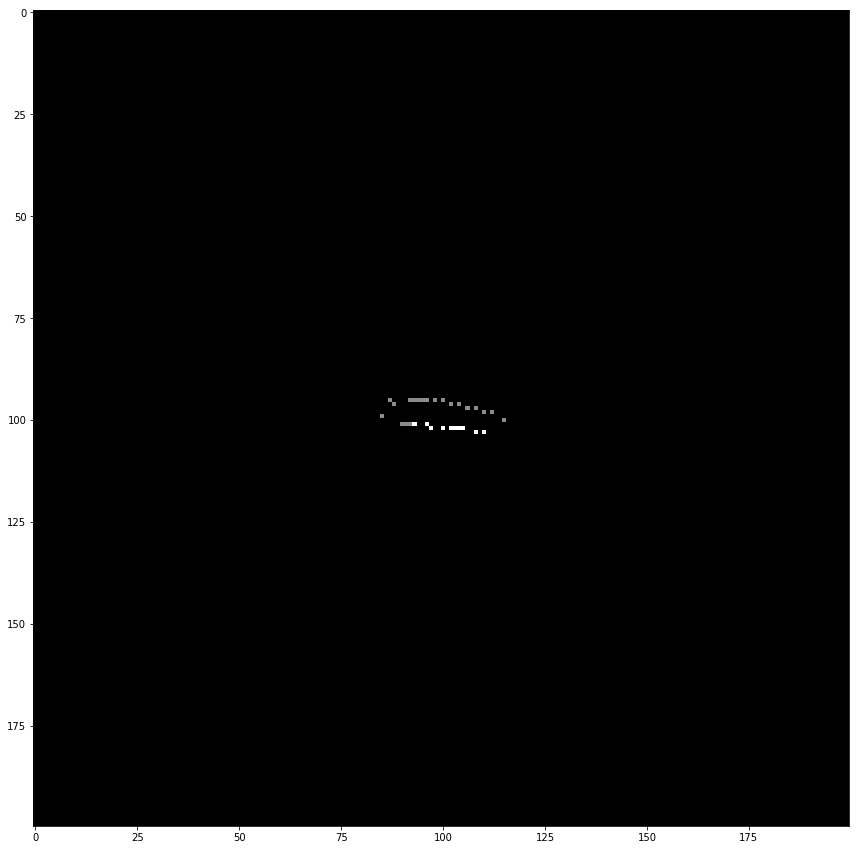

49


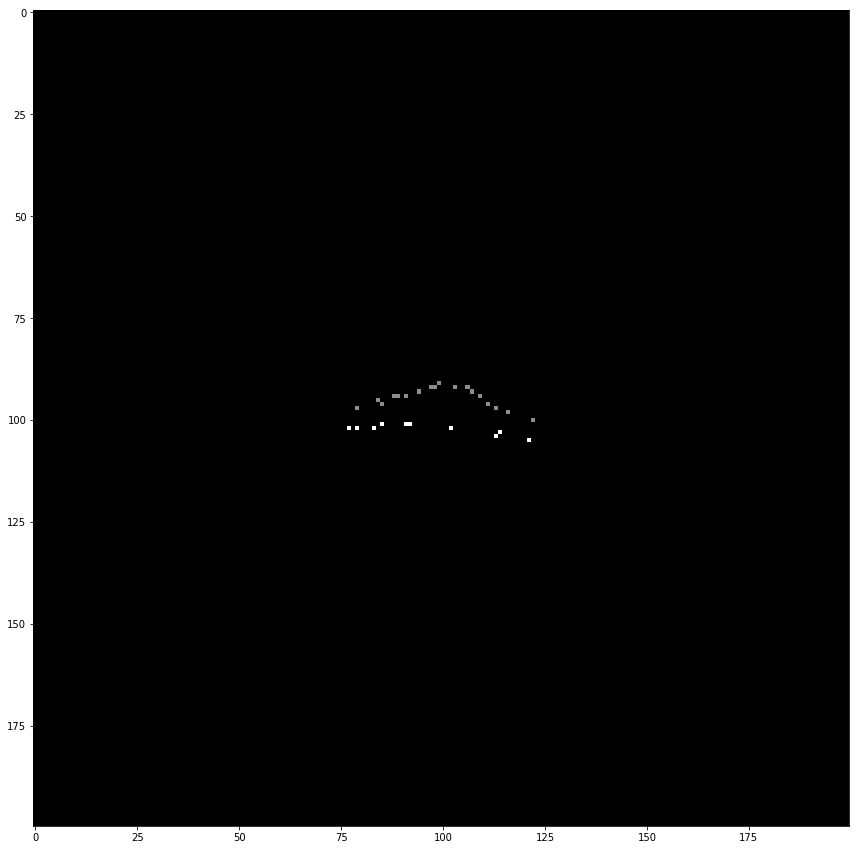

51


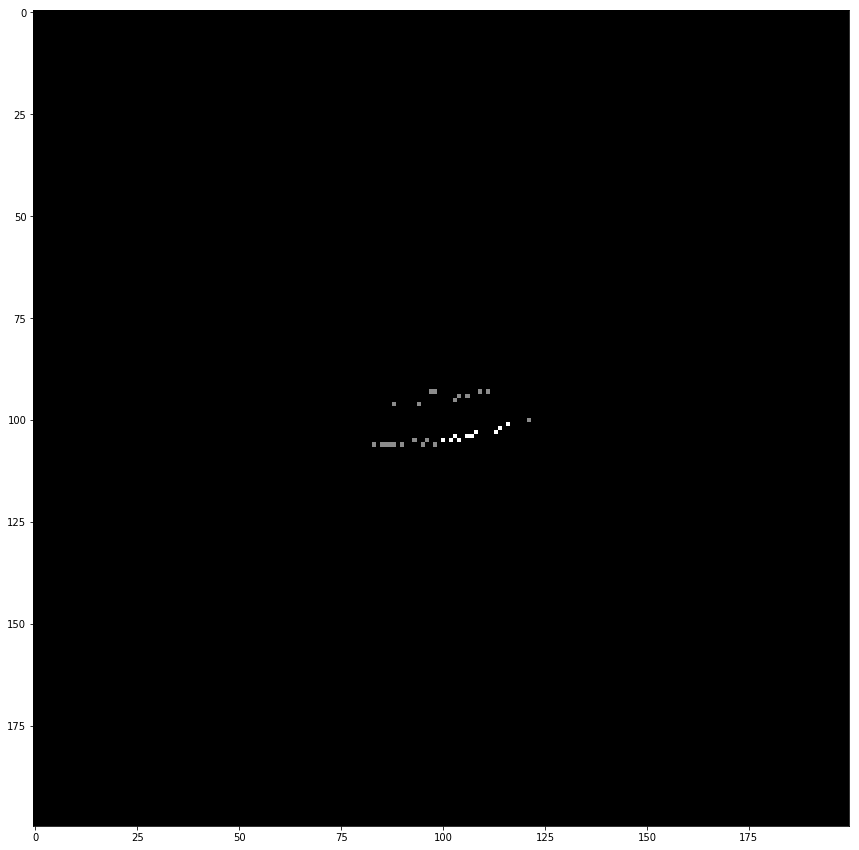

52


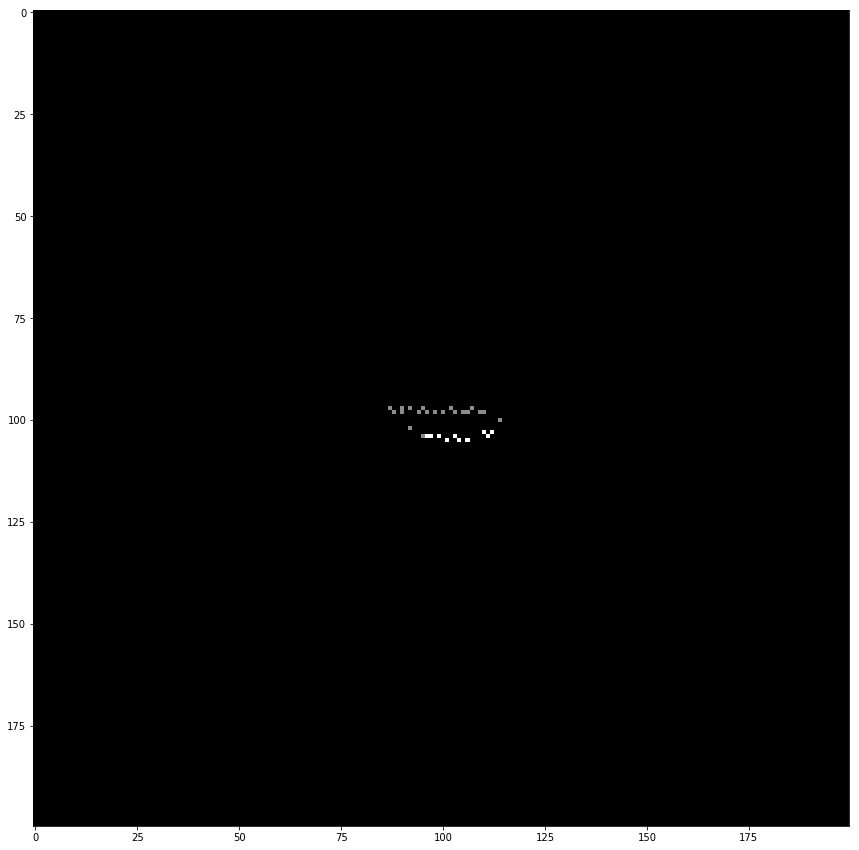

53


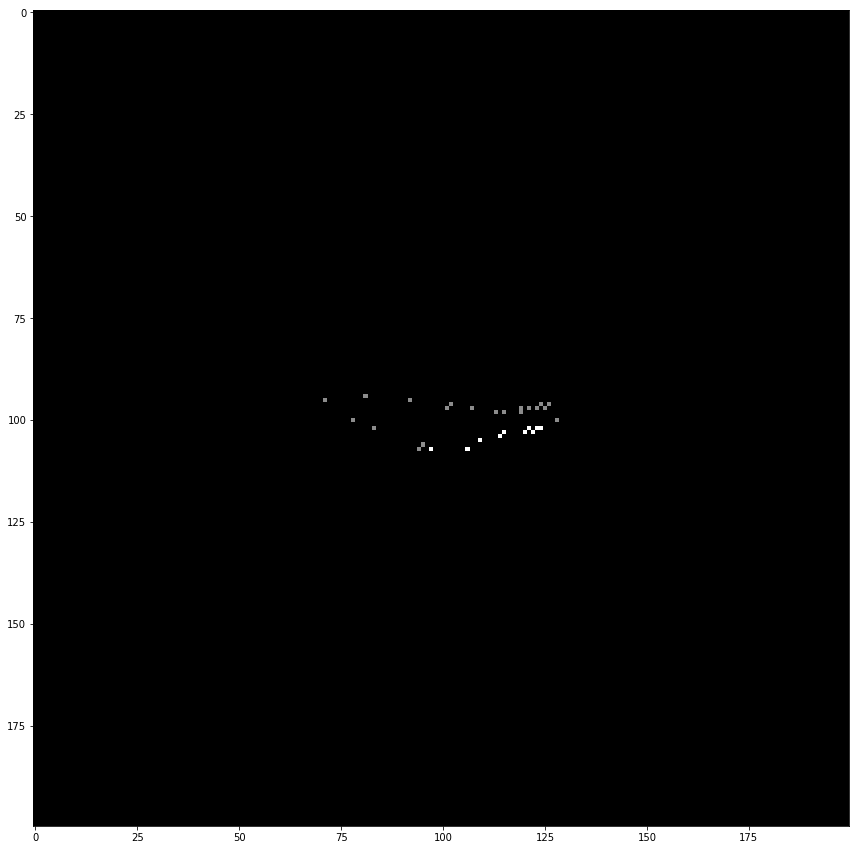

54


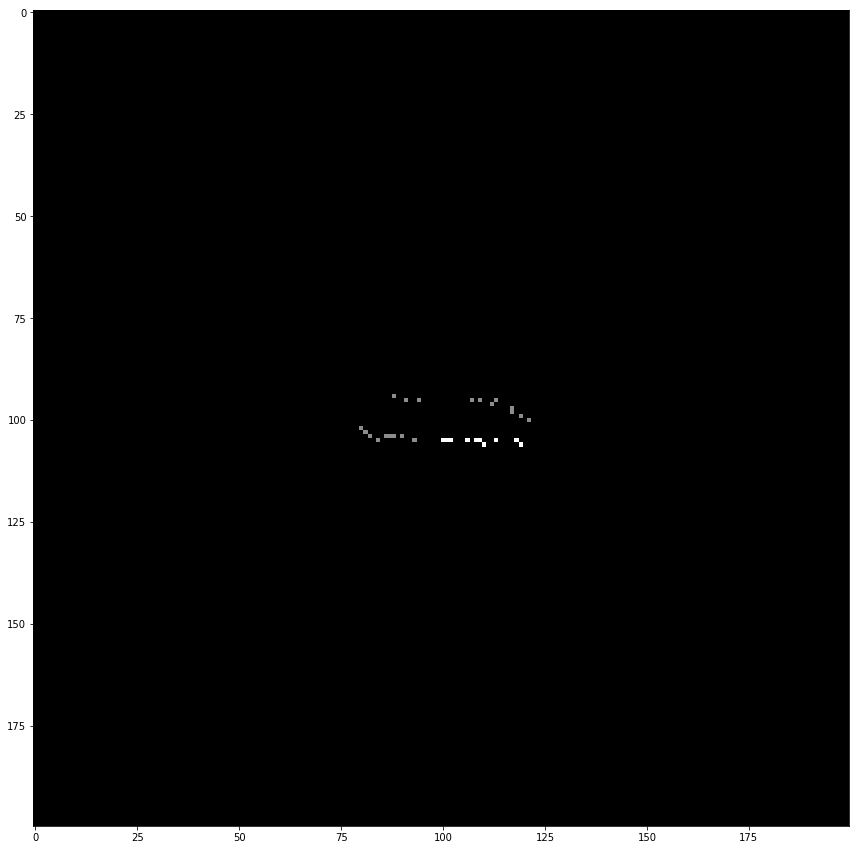

55


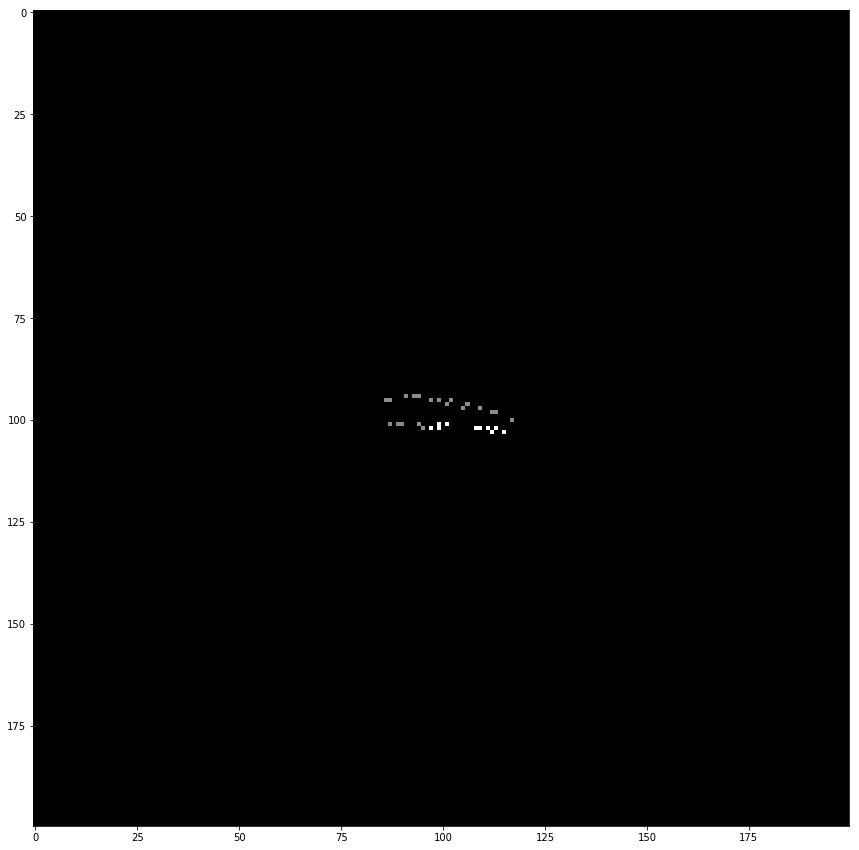

56


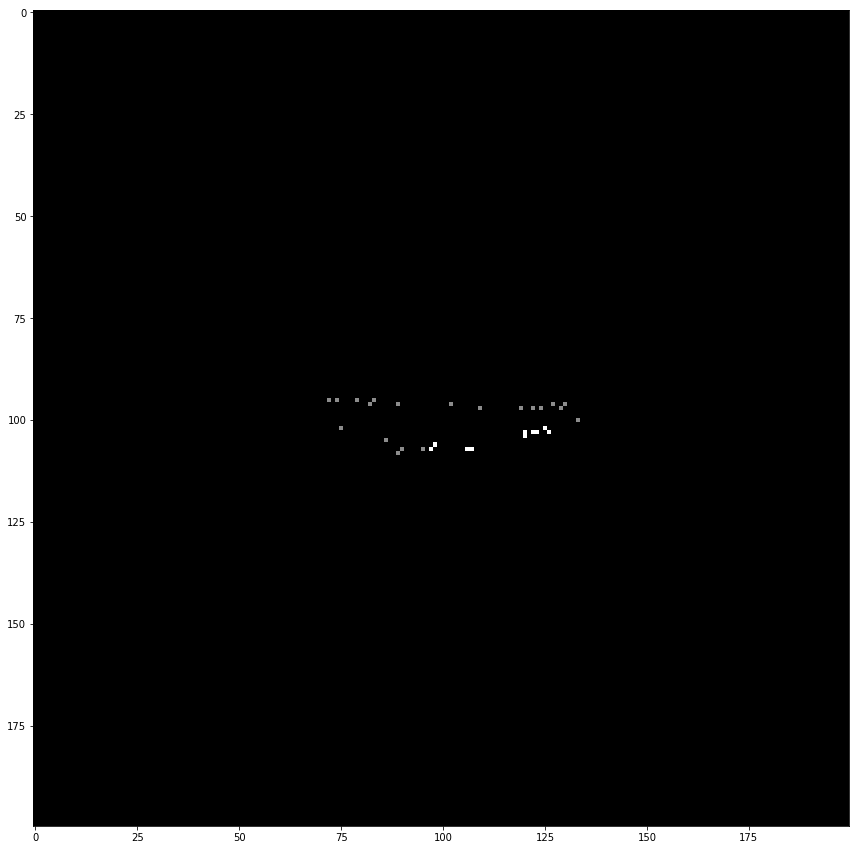

57


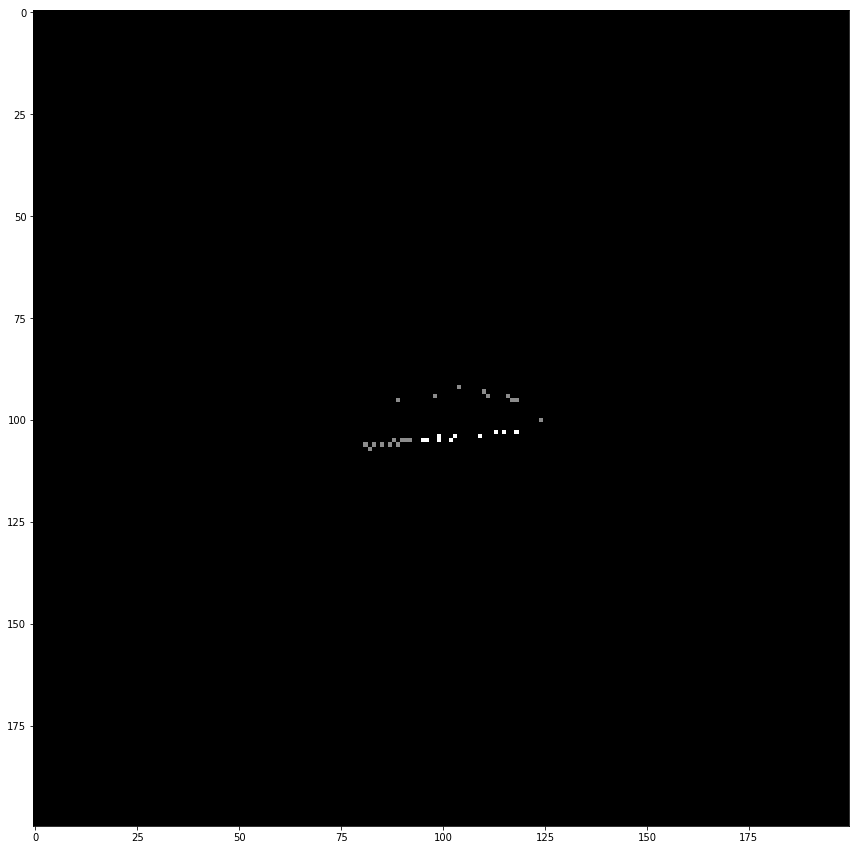

58


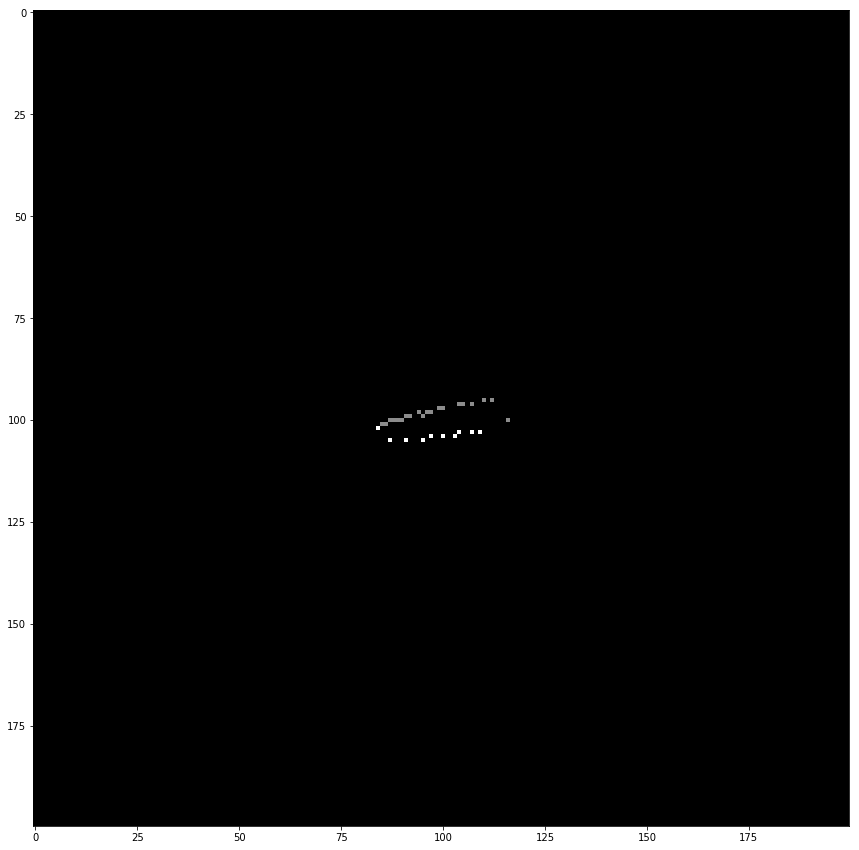

59


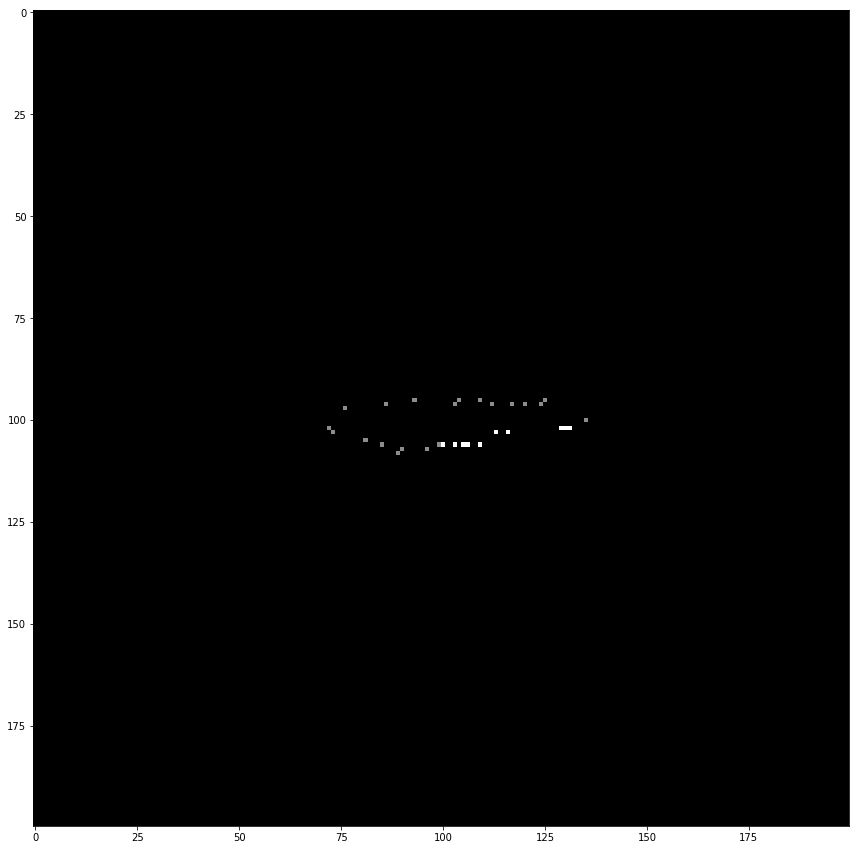

In [3]:
import fishy
import numpy as np

myFishes = np.empty((60),dtype=fishy.FishBlob)


for i in range(0,60):
    myFishes[i] = fishy.FishBlob(np.array(data[i].xs),np.array(data[i].ys),np.array([data[i].c_x,data[i].c_y]))
    if not myFishes[i].length <30:
        f = myFishes[i]
        f.reduceToSubfish(30)
        print(i)
        normalFish = fishy.normalizeFish(f.X,f.Y,f.centroid)
        fishy.printFish(normalFish,canvasSize=200)


In [4]:
#Setup for PCA

cov_mat = np.cov(fishFeatures.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_vals

NameError: name 'fishFeatures' is not defined

In [5]:
#Some Helpful Functions

def fromFishBlob(fishBlob):
    n = len(fishBlob)
    X,Y = np.reshape(fishBlob[:,:,0],(n)), np.reshape(fishBlob[:,:,1],(n))
    return X,Y

def toFishBlob(X,Y):
    n = len(X)
    x, y = np.reshape(X,(n,1,1)), np.reshape(Y,(n,1,1))
    fishBlob = np.concatenate((x,y),axis=2)
    return fishBlob

def getCentroid(fishBlob):
    # calculate moments of binary image
    M = cv2.moments(fishBlob)
    # calculate x,y coordinate of center
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    return cX, cY

def randomSubarray(arr, subarrayLen):
    return arr[sorted(random.sample(range(0,len(arr)),subarrayLen))]

def euclid(a,b):
    vec = b-a
    return math.sqrt(vec[0]**2+vec[1]**2)

#Get numpy array of all distances between points on the fish contour
#stepSize=1 means the distance between neighbours is calculated
#stepSize>1 means a number of points are skipped
#This is useful for estimating hole sizes when you remove one point
def getDistances(fish, stepSize):
    fishSize = len(fish)
    distances = np.zeros((fishSize))
    
    for i, _ in enumerate(distances):
        distances[i] = euclid(fish[i][0],myFish[(i+stepSize)%fishSize][0])
    return distances